<a href="https://colab.research.google.com/github/TitanLeonov/Leonov_Alexander_PI3-1b_computer_math_/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%9610_%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B8_%D0%BF%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D1%85_%D1%80%D1%8F%D0%B4%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа №10. Визуализация, анализ и прогнозирование временных рядов

# Блок №1. Теория

## 1. Регистрация и получение API ключа


Перед началом работы с API OpenWeatherMap, вам необходимо зарегистрироваться на сайте OpenWeatherMap и получить API ключ. Этот ключ будет использоваться для аутентификации ваших запросов к API.

In [164]:
API_KEY = "0e4311f2d4382013f638b68de98f07c5"

In [146]:
!pip install plotly gapminder
!pip install plotly vega_datasets
!pip install pycountry


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 17.2 MB/s eta 0:00:00


In [154]:
!pip install pmdarima
!pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.9 MB/s eta 0:00:00


## 2. Установка необходимых библиотек


Убедитесь, что у вас установлены следующие библиотеки:
```python
pip install requests pandas plotly scikit-learn
```

*(установлены по умолчанию в colab)*

## 3. Получение и обработка данных о погоде
Следующий код демонстрирует, как получить данные о погоде для списка городов и стран:



In [165]:
import requests  # Импорт библиотеки requests для отправки HTTP-запросов
import pandas as pd  # Импорт библиотеки pandas для обработки и анализа данных

API_KEY = "0e4311f2d4382013f638b68de98f07c5"  # Ключ API для доступа к данным OpenWeatherMap
locations = ["Paris,FR", "Berlin,DE", "Moscow,RU"]  # Список мест, для которых вы хотите получить данные о погоде

weather_data_list = []  # Пустой список для хранения данных о погоде

# Цикл по всем местам в списке locations
for location in locations:
    city, country = location.split(',')  # Разделение строки на город и страну
    # Формирование URL для запроса геокодирования
    geocode_url = f"http://api.openweathermap.org/geo/1.0/direct?q={city},{country}&limit=1&appid={API_KEY}"
    geocode_response = requests.get(geocode_url).json()  # Отправка запроса и получение ответа в формате JSON
    # Если ответ не пустой
    if geocode_response:
        latitude = geocode_response[0]['lat']  # Получение широты из ответа
        longitude = geocode_response[0]['lon']  # Получение долготы из ответа
        # Формирование URL для запроса прогноза погоды
        forecast_url = f"http://api.openweathermap.org/data/2.5/forecast?lat={latitude}&lon={longitude}&appid={API_KEY}"
        forecast_data = requests.get(forecast_url).json()['list']  # Отправка запроса и получение данных прогноза
        # Цикл по всем записям в данных прогноза
        for entry in forecast_data:
            # Добавление данных о погоде в список
            weather_data_list.append({
                "city": city,
                "country": country,
                "latitude": latitude,
                "longitude": longitude,
                "datetime": entry['dt_txt'],
                "temperature": entry["main"]["temp"] - 273.15,  # Преобразование температуры из Кельвинов в градусы Цельсия
                "humidity": entry["main"]["humidity"],  # Влажность
                "description": entry["weather"][0]["description"]  # Описание погоды
            })

# Преобразование списка в DataFrame
weather_data = pd.DataFrame(weather_data_list)
# Преобразование строки с датой и временем в объект datetime
weather_data['datetime'] = pd.to_datetime(weather_data['datetime'])


In [166]:
weather_data

,city,country,latitude,longitude,datetime,temperature,humidity,description
0,Paris,FR,48.858890,2.320041,2024-05-20 00:00:00,15.10,83,few clouds
1,Paris,FR,48.858890,2.320041,2024-05-20 03:00:00,13.36,90,few clouds
2,Paris,FR,48.858890,2.320041,2024-05-20 06:00:00,12.93,89,scattered clouds
3,Paris,FR,48.858890,2.320041,2024-05-20 09:00:00,18.14,63,broken clouds
4,Paris,FR,48.858890,2.320041,2024-05-20 12:00:00,21.92,45,overcast clouds
...,...,...,...,...,...,...,...,...
115,Moscow,RU,55.750446,37.617494,2024-05-24 09:00:00,19.62,29,clear sky
116,Moscow,RU,55.750446,37.617494,2024-05-24 12:00:00,21.05,27,clear sky
117,Moscow,RU,55.750446,37.617494,2024-05-24 15:00:00,20.32,32,few clouds
118,Moscow,RU,55.750446,37.617494,2024-05-24 18:00:00,16.35,48,few clouds


## 4. Визуализация данных
Для визуализации данных о погоде на карте мы можем использовать библиотеку Plotly:


In [167]:
import plotly.express as px  # Импорт модуля plotly.express для создания интерактивных графиков

# Создание диаграммы рассеяния на карте с использованием данных о погоде
fig = px.scatter_mapbox(weather_data,  # Данные для графика
                        lat="latitude",  # Колонка в данных, которая будет использоваться для широты точек на карте
                        lon="longitude",  # Колонка в данных, которая будет использоваться для долготы точек на карте
                        color="temperature",  # Колонка в данных, которая будет использоваться для цвета точек
                        size="humidity",  # Колонка в данных, которая будет использоваться для размера точек
                        hover_name="city",  # Колонка в данных, которая будет отображаться при наведении на точку
                        hover_data=["description"],  # Дополнительные данные, которые будут отображаться при наведении на точку
                        # Создание анимации по времени. Время преобразуется в строку для корректного отображения
                        animation_frame=weather_data['datetime'].dt.strftime('%Y-%m-%d %H:%M:%S'),
                        center={"lat": 50, "lon": 14},  # Центр карты при открытии
                        zoom=3,  # Уровень приближения карты при открытии
                        mapbox_style="carto-positron",  # Стиль карты
                        title="Weather Forecast")  # Заголовок графика

fig.show()  # Отображение графика


In [168]:
import requests
import pandas as pd
import plotly.express as px

# Замените на свой API ключ OpenWeatherMap
API_KEY = "0e4311f2d4382013f638b68de98f07c5"

# Список городов и стран для запроса
locations = [
    {"city": "New York", "country": "US"},
    # Добавьте другие города и страны по вашему выбору
]

# Запрос данных о погоде
weather_data = []
for loc in locations:
    url = f"http://api.openweathermap.org/data/2.5/weather?q={loc['city']},{loc['country']}&appid={API_KEY}"
    response = requests.get(url)
    data = response.json()
    weather_data.append({
        "city": loc["city"],
        "country": loc["country"],
        "temperature": data["main"]["temp"] - 273.15,  # Кельвины в Цельсии
    })

# Создание DataFrame
df = pd.DataFrame(weather_data)

# Визуализация на тематической карте
fig = px.choropleth(
    df,
    locations="country",
    locationmode="country names",
    color="temperature",
    hover_name="city",
    title="Температура в разных городах",
    color_continuous_scale="Viridis",
)

fig.show()


In [169]:
df

,city,country,temperature
0,New York,US,22.24


# Блок 2. Анализ данных

### Задание №1. Получите прогноз погоды на 5 дней по любым 4 городам

In [170]:
import requests
import pandas as pd

API_KEY = "0e4311f2d4382013f638b68de98f07c5"  # Замените на ваш реальный API-ключ
locations = ["Paris,FR", "Berlin,DE", "Moscow,RU", "Tokyo,JP"]  # Список мест, для которых вы хотите получить данные о погоде


weather_data_list = []  # Пустой список для хранения данных о погоде

# Цикл по всем местам в списке locations
for location in locations:
    city, country = location.split(',')  # Разделение строки на город и страну
    # Формирование URL для запроса геокодирования
    geocode_url = f"http://api.openweathermap.org/geo/1.0/direct?q={city},{country}&limit=1&appid={API_KEY}"
    geocode_response = requests.get(geocode_url).json()  # Отправка запроса и получение ответа в формате JSON
    # Если ответ не пустой
    if geocode_response:
        latitude = geocode_response[0]['lat']  # Получение широты из ответа
        longitude = geocode_response[0]['lon']  # Получение долготы из ответа
        # Формирование URL для запроса прогноза погоды
        forecast_url = f"http://api.openweathermap.org/data/2.5/forecast?lat={latitude}&lon={longitude}&appid={API_KEY}"
        forecast_data = requests.get(forecast_url).json()['list']  # Отправка запроса и получение данных прогноза
        # Цикл по всем записям в данных прогноза
        for entry in forecast_data:
            # Добавление данных о погоде в список
            weather_data_list.append({
                "city": city,
                "country": country,
                "latitude": latitude,
                "longitude": longitude,
                "datetime": entry['dt_txt'],
                "temperature": entry["main"]["temp"] - 273.15,  # Преобразование температуры из Кельвинов в градусы Цельсия
                "feels_like": entry["main"]["feels_like"] - 273.15, # Температура по ощущению (с преобразованием)
                "temp_min": entry["main"]["temp_min"] - 273.15, # Минимальная температура (с преобразованием)
                "temp_max": entry["main"]["temp_max"] - 273.15, # Максимальная температура (с преобразованием)
                "pressure": entry["main"]["pressure"],  # Давление
                "humidity": entry["main"]["humidity"],  # Влажность
                "description": entry["weather"][0]["description"]  # Описание погоды
            })

# Преобразование списка в DataFrame
weather_data = pd.DataFrame(weather_data_list)
# Преобразование строки с датой и временем в объект datetime




In [171]:
weather_data

,city,country,latitude,longitude,datetime,temperature,feels_like,temp_min,temp_max,pressure,humidity,description
0,Paris,FR,48.858890,2.320041,2024-05-20 00:00:00,15.10,14.83,13.44,15.10,1012,83,few clouds
1,Paris,FR,48.858890,2.320041,2024-05-20 03:00:00,13.36,13.10,12.08,13.36,1011,90,few clouds
2,Paris,FR,48.858890,2.320041,2024-05-20 06:00:00,12.93,12.60,12.93,12.93,1011,89,scattered clouds
3,Paris,FR,48.858890,2.320041,2024-05-20 09:00:00,18.14,17.65,18.14,18.14,1011,63,broken clouds
4,Paris,FR,48.858890,2.320041,2024-05-20 12:00:00,21.92,21.34,21.92,21.92,1009,45,overcast clouds
...,...,...,...,...,...,...,...,...,...,...,...,...
155,Tokyo,JP,35.682839,139.759455,2024-05-24 09:00:00,21.81,21.90,21.81,21.81,1005,71,overcast clouds
156,Tokyo,JP,35.682839,139.759455,2024-05-24 12:00:00,20.71,20.82,20.71,20.71,1006,76,overcast clouds
157,Tokyo,JP,35.682839,139.759455,2024-05-24 15:00:00,20.08,20.31,20.08,20.08,1006,83,overcast clouds
158,Tokyo,JP,35.682839,139.759455,2024-05-24 18:00:00,19.21,19.17,19.21,19.21,1007,76,light rain


### Задание №2. Вычислите общее среднее значение и стандартное отклонение температуры по всем городам

In [63]:
mean_temperature = weather_data['temperature'].mean()

# Вычисление стандартного отклонения температуры
std_temperature = weather_data['temperature'].std()

print(f"Среднее значение температуры: {mean_temperature:.2f} °C")
print(f"Стандартное отклонение температуры: {std_temperature:.2f} °C")

Среднее значение температуры: 18.01 °C
Стандартное отклонение температуры: 3.76 °C


### Задание №3. Визуализируйте распределения температуры по дням. Отдельно по каждому городу (На одной плоскости должно быть четыре графика)


##### Пример визуализации по одному городу:

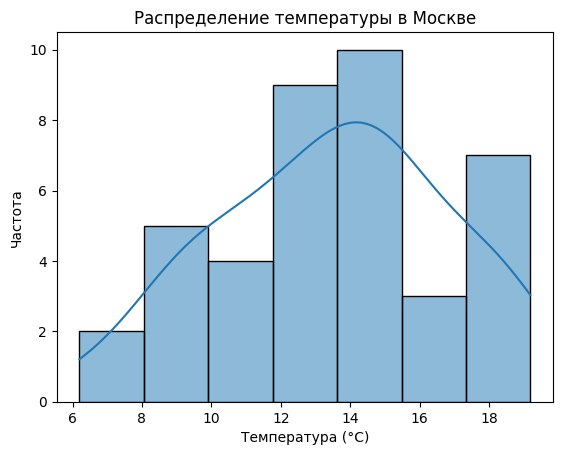

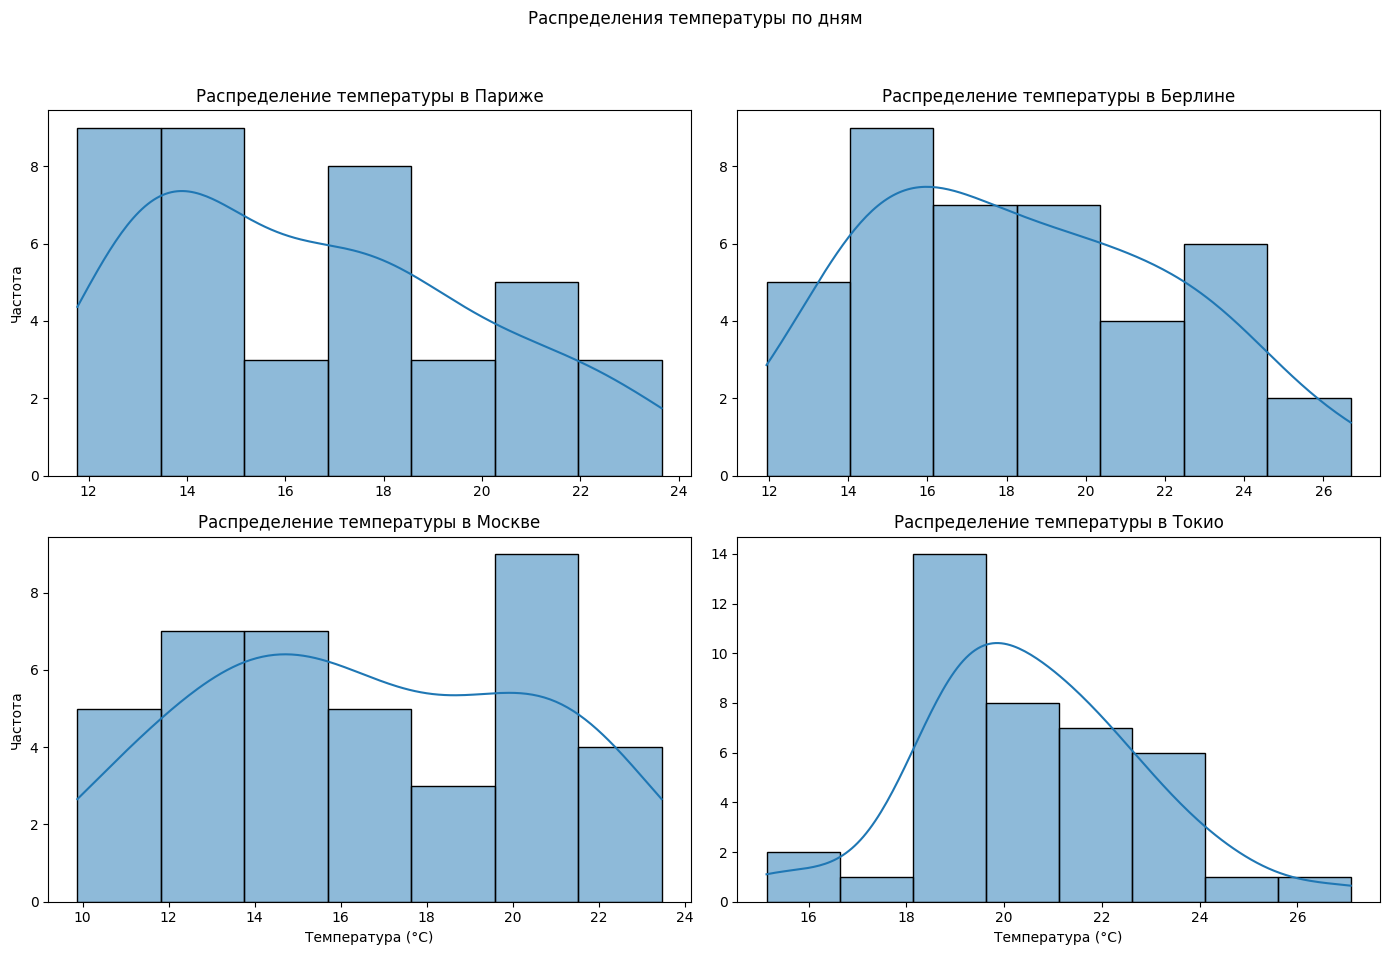

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Распределения температуры по дням')

cities = ['Paris', 'Berlin', 'Moscow', 'Tokyo']

sns.histplot(ax=axes[0, 0], kde=True, x=weather_data[weather_data['city'] == 'Paris']['temperature'])
axes[0, 0].set_title('Распределение температуры в Париже')
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('Частота')

sns.histplot(ax=axes[0, 1], kde=True, x=weather_data[weather_data['city'] == 'Berlin']['temperature'])
axes[0, 1].set_title('Распределение температуры в Берлине')
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('')

sns.histplot(ax=axes[1, 0], kde=True, x=weather_data[weather_data['city'] == 'Moscow']['temperature'])
axes[1, 0].set_title('Распределение температуры в Москве')
axes[1, 0].set_xlabel('Температура (°C)')
axes[1, 0].set_ylabel('Частота')

sns.histplot(ax=axes[1, 1], kde=True, x=weather_data[weather_data['city'] == 'Tokyo']['temperature'])
axes[1, 1].set_title('Распределение температуры в Токио')
axes[1, 1].set_xlabel('Температура (°C)')
axes[1, 1].set_ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Задание №4. Визуализируйте Корреляционну матрицу. Отдельно по каждому городу (На одной плоскости должно быть четыре графика). Затем общую корреляционную матрицу по всем данным из набора.


##### Пример визуализации по одному городу:

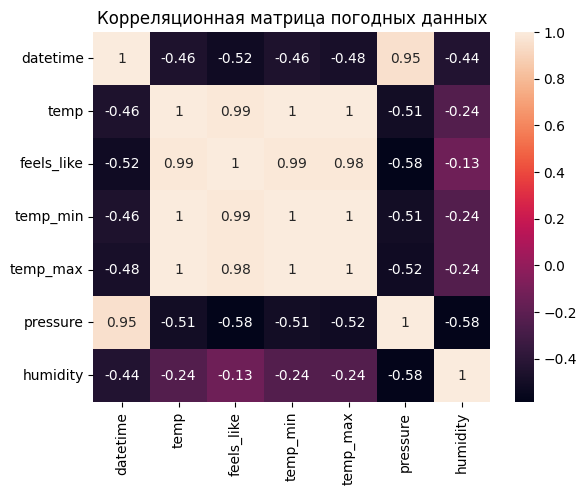

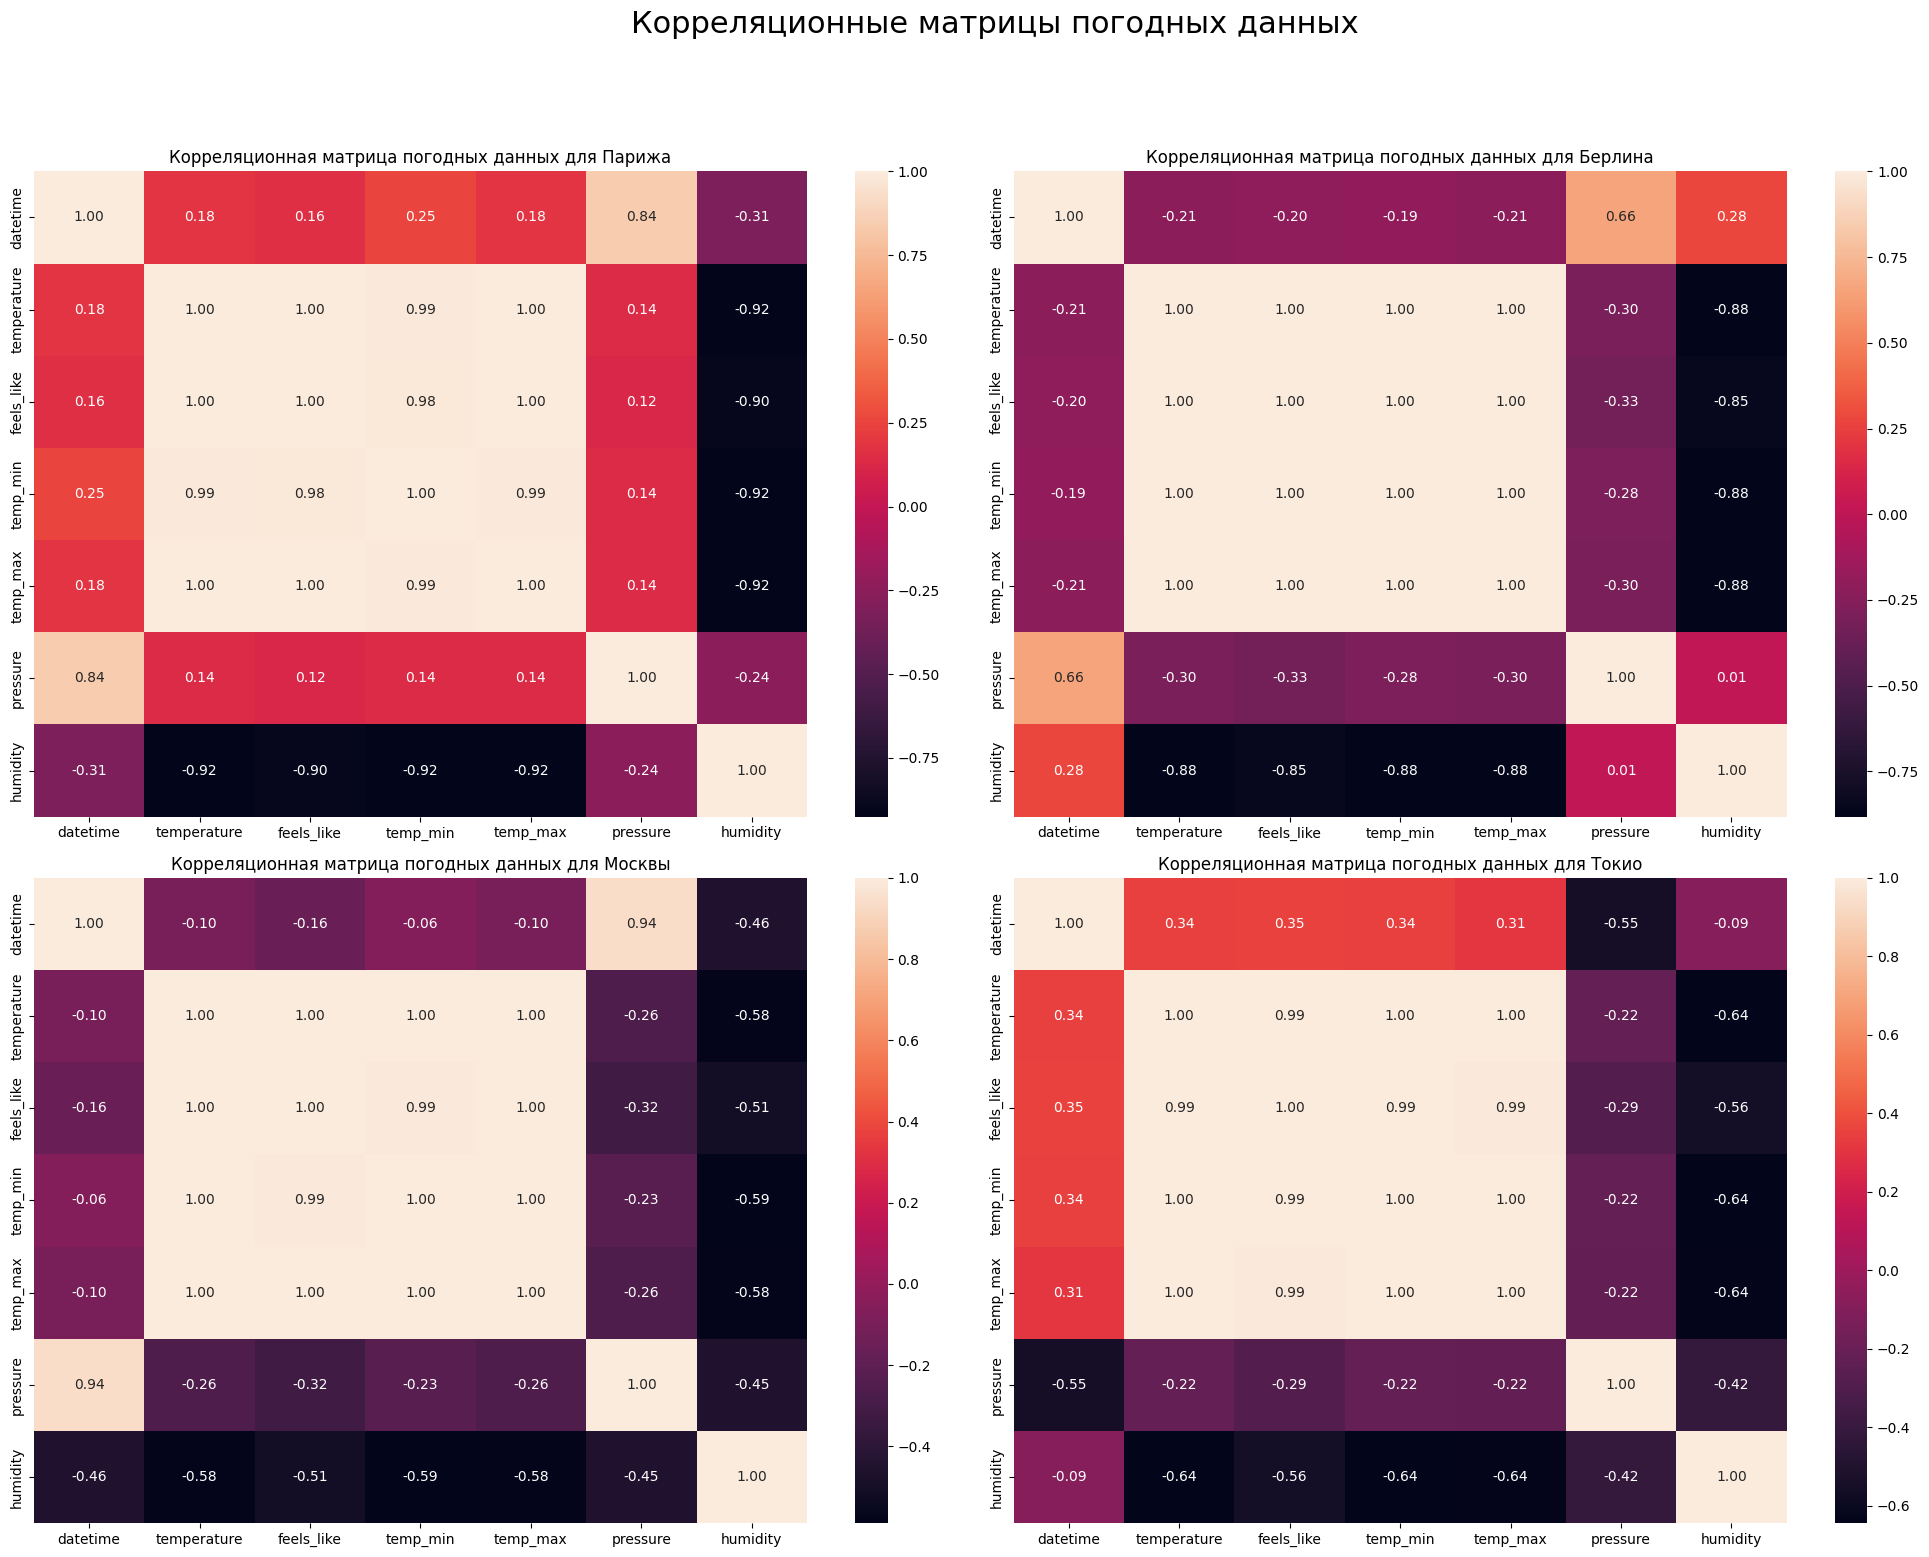

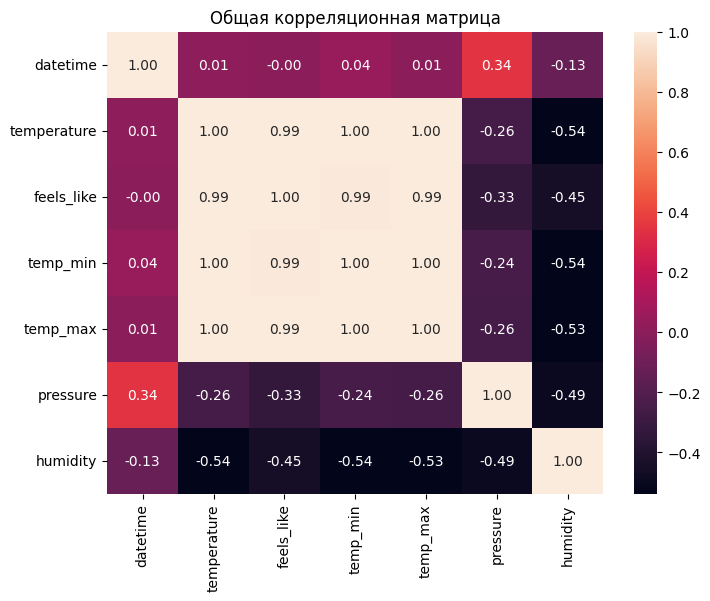

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Предположим, что у вас уже есть DataFrame `weather_data`
# Пример данных:
# weather_data = pd.read_csv('path_to_your_data.csv')

fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Корреляционные матрицы погодных данных', y=1, fontsize=22)

cities = ['Paris', 'Berlin', 'Moscow', 'Tokyo']

sns.heatmap(ax=axes[0, 0], data=weather_data[weather_data['city'] == 'Paris'][['datetime', 'temperature', 'feels_like', 'temp_min', 'temp_max', 'pressure', 'humidity']].corr(), annot=True, fmt=".2f")
axes[0, 0].set_title('Корреляционная матрица погодных данных для Парижа')

sns.heatmap(ax=axes[0, 1], data=weather_data[weather_data['city'] == 'Berlin'][['datetime', 'temperature', 'feels_like', 'temp_min', 'temp_max', 'pressure', 'humidity']].corr(), annot=True, fmt=".2f")
axes[0, 1].set_title('Корреляционная матрица погодных данных для Берлина')

sns.heatmap(ax=axes[1, 0], data=weather_data[weather_data['city'] == 'Moscow'][['datetime', 'temperature', 'feels_like', 'temp_min', 'temp_max', 'pressure', 'humidity']].corr(), annot=True, fmt=".2f")
axes[1, 0].set_title('Корреляционная матрица погодных данных для Москвы')

sns.heatmap(ax=axes[1, 1], data=weather_data[weather_data['city'] == 'Tokyo'][['datetime', 'temperature', 'feels_like', 'temp_min', 'temp_max', 'pressure', 'humidity']].corr(), annot=True, fmt=".2f")
axes[1, 1].set_title('Корреляционная матрица погодных данных для Токио')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(data=weather_data[['datetime', 'temperature', 'feels_like', 'temp_min', 'temp_max', 'pressure', 'humidity']].corr(), annot=True, fmt=".2f")
plt.title('Общая корреляционная матрица')
plt.show()

### Задание №5. Визуализируйте тренд изменения температуры со временем. Отдельно по каждому городу (На одной плоскости должно быть четыре графика).

##### Пример визуализации по одному городу:

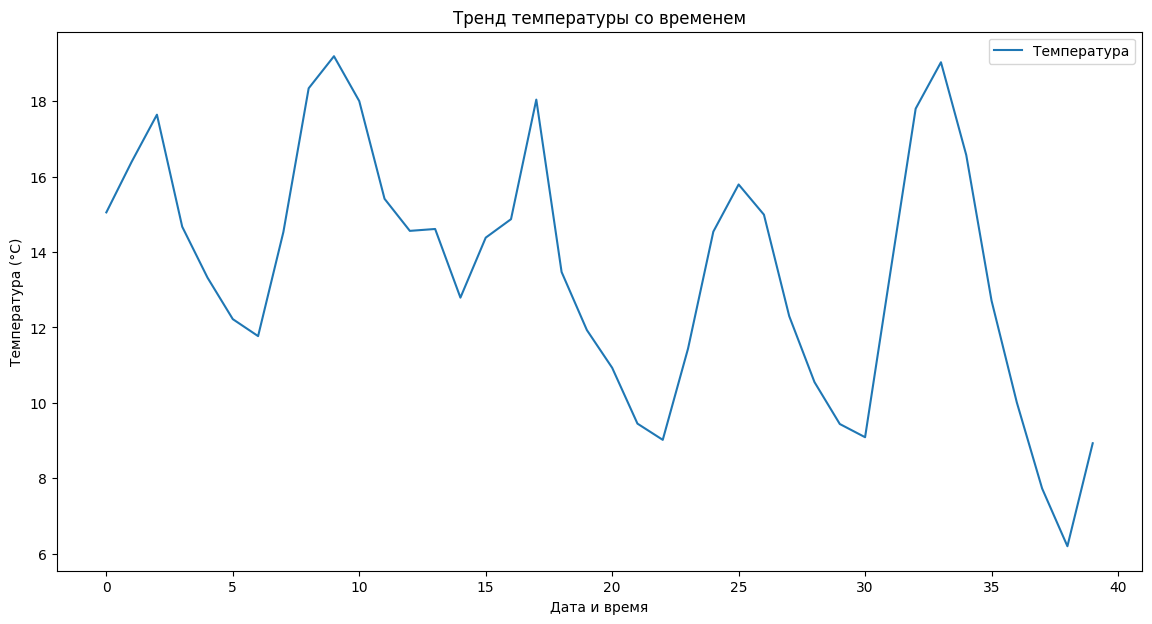

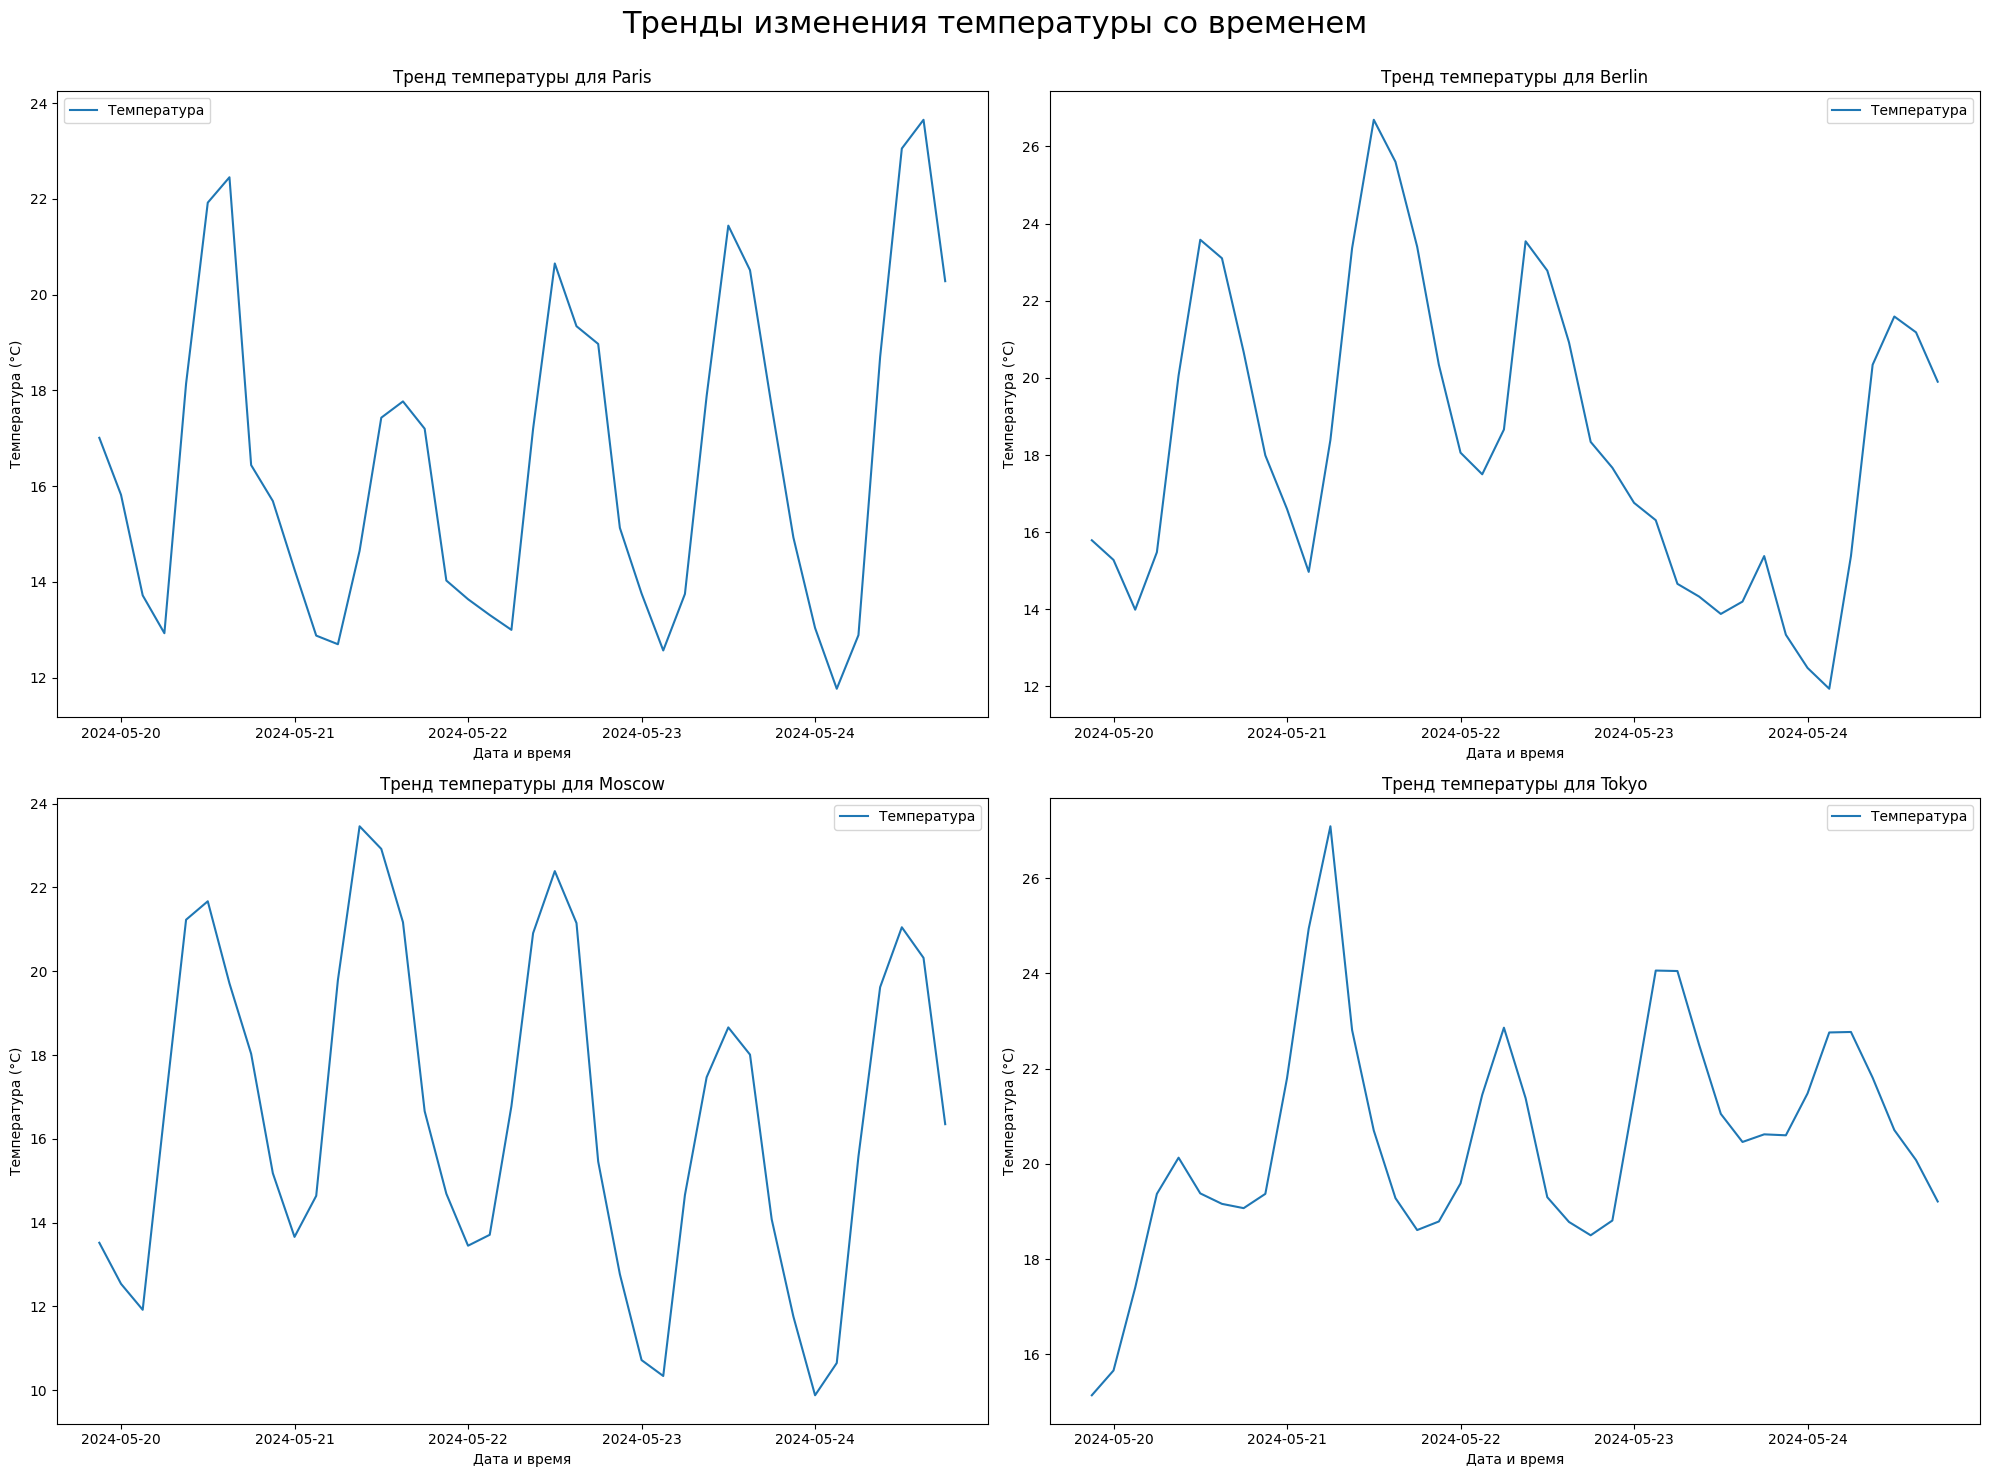

In [9]:
import pandas as pd
import matplotlib.pyplot as plt


fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Тренды изменения температуры со временем', y=0.95, fontsize=22)

cities = ['Paris', 'Berlin', 'Moscow', 'Tokyo']

for i, city in enumerate(cities):
    city_data = weather_data[weather_data['city'] == city]
    axes[i // 2, i % 2].plot(city_data['datetime'], city_data['temperature'], label='Температура')
    axes[i // 2, i % 2].set_title(f'Тренд температуры для {city}')
    axes[i // 2, i % 2].set_xlabel('Дата и время')
    axes[i // 2, i % 2].set_ylabel('Температура (°C)')
    axes[i // 2, i % 2].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Задание №6.1. Отобразите среднюю дневную (с 04:00 до 23:00) температуру для каждого города (На одной плоскости должно быть четыре графика):

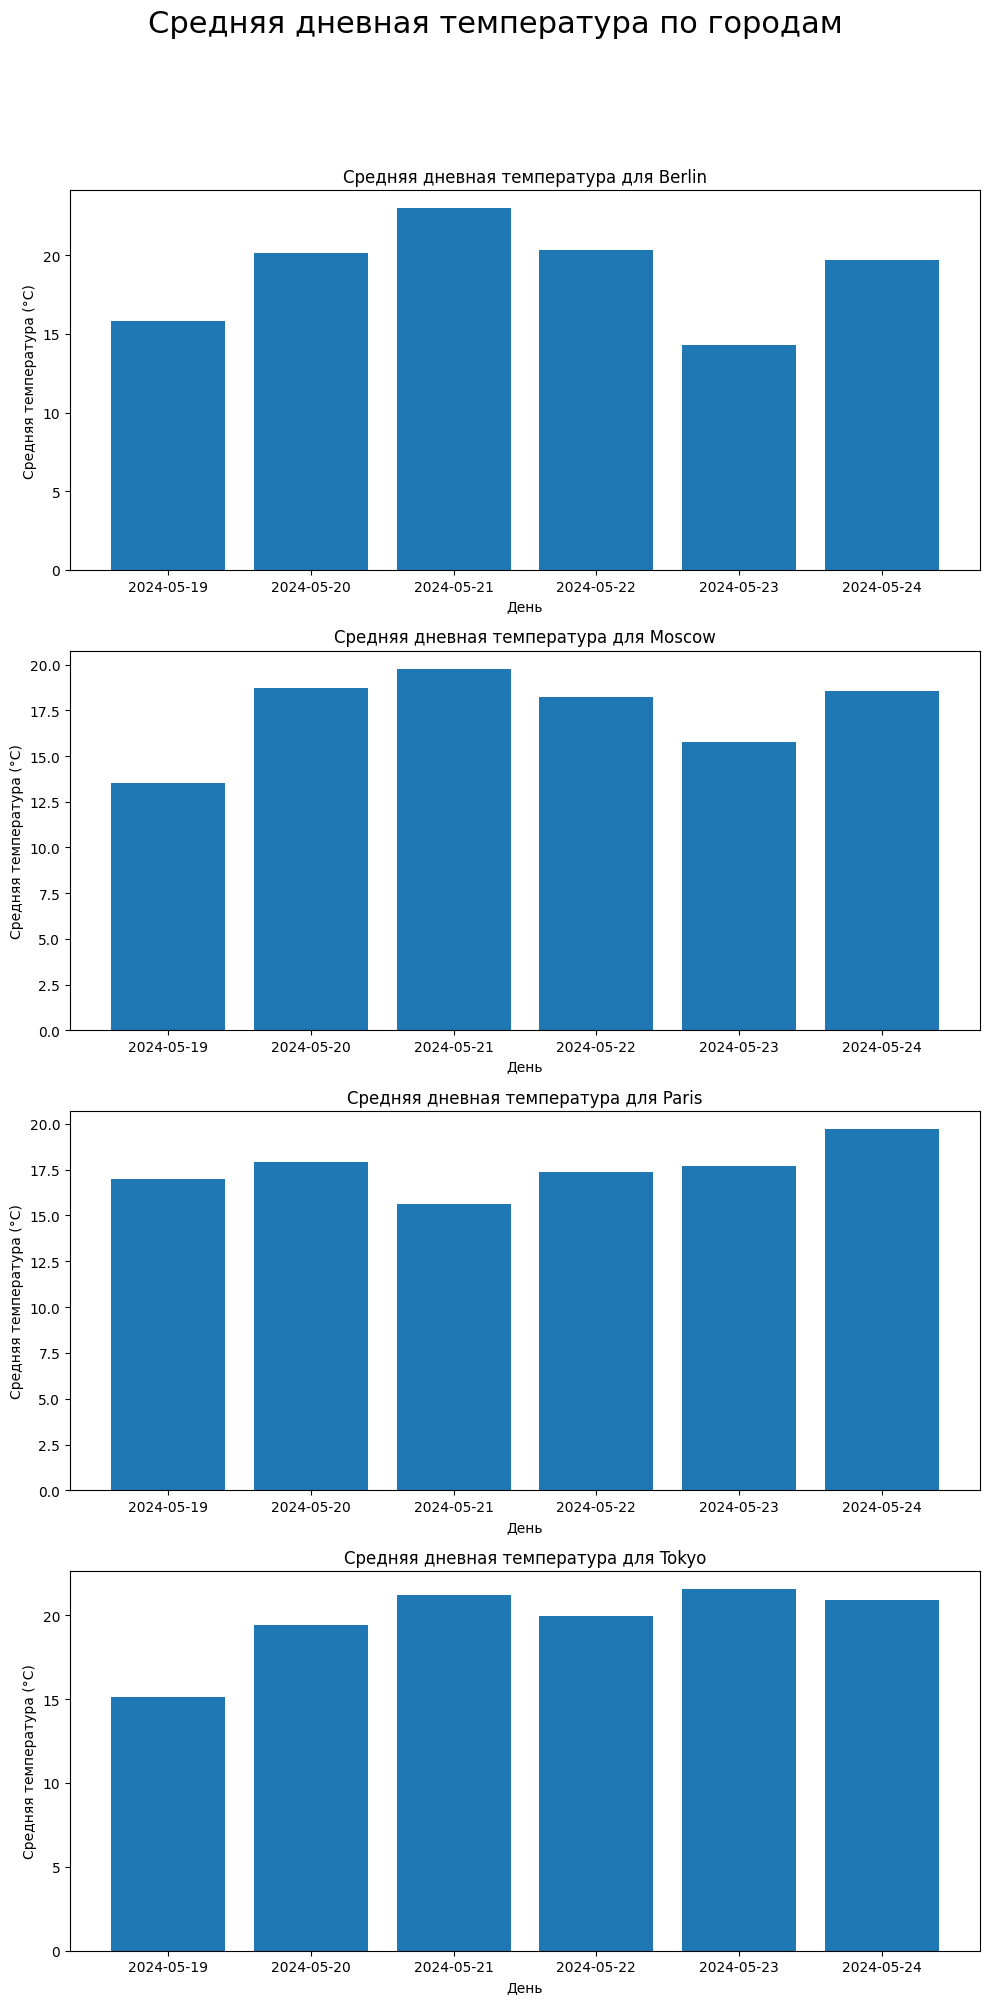

In [10]:
import pandas as pd
import matplotlib.pyplot as plt


# Преобразование строки с датой и временем в объект datetime
weather_data['datetime'] = pd.to_datetime(weather_data['datetime'])

# Фильтрация данных с 04:00 до 23:00
filtered_data = weather_data[(weather_data['datetime'].dt.hour >= 4) & (weather_data['datetime'].dt.hour <= 23)]

# Вычисление средней дневной температуры для каждого города
mean_daily_temperature_per_city = filtered_data.groupby(['city', filtered_data['datetime'].dt.date])['temperature'].mean().reset_index(name='mean_temp')

# Получение списка уникальных городов
locations = mean_daily_temperature_per_city['city'].unique()

# Создание подграфиков для каждого города
fig, axes = plt.subplots(len(locations), 1, figsize=(10, len(locations) * 5))
fig.suptitle('Средняя дневная температура по городам', y=1, fontsize=22)

for i, city in enumerate(locations):
    city_data = mean_daily_temperature_per_city[mean_daily_temperature_per_city['city'] == city]
    axes[i].bar(city_data['datetime'], city_data['mean_temp'])
    axes[i].set_title(f'Средняя дневная температура для {city}')
    axes[i].set_xlabel('День')
    axes[i].set_ylabel('Средняя температура (°C)')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

##### Пример визуализации по одному городу:

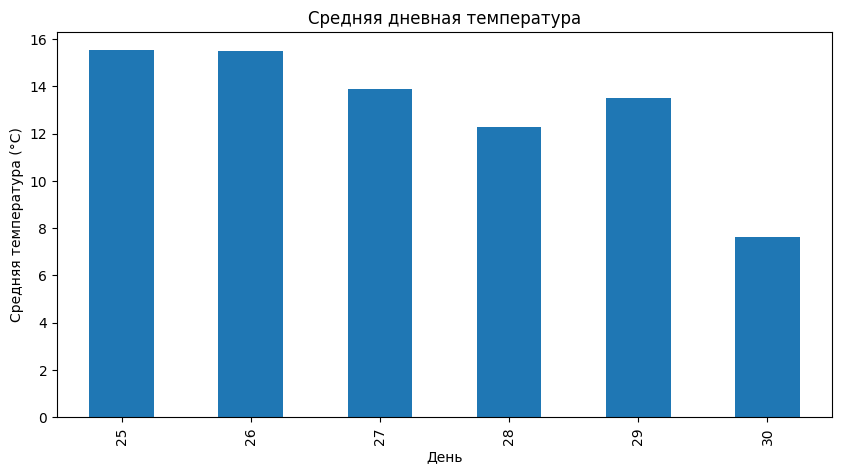

### Задание №6.2. Отобразите среднюю дневную (с 04:00 до 23:00) и ночную (с 23:00 до 04:00) температуру для каждого города (На одной плоскости должно быть четыре графика):

<ipython-input-11-1fc57425c91b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_night_data['date'] = filtered_night_data['datetime'].dt.date


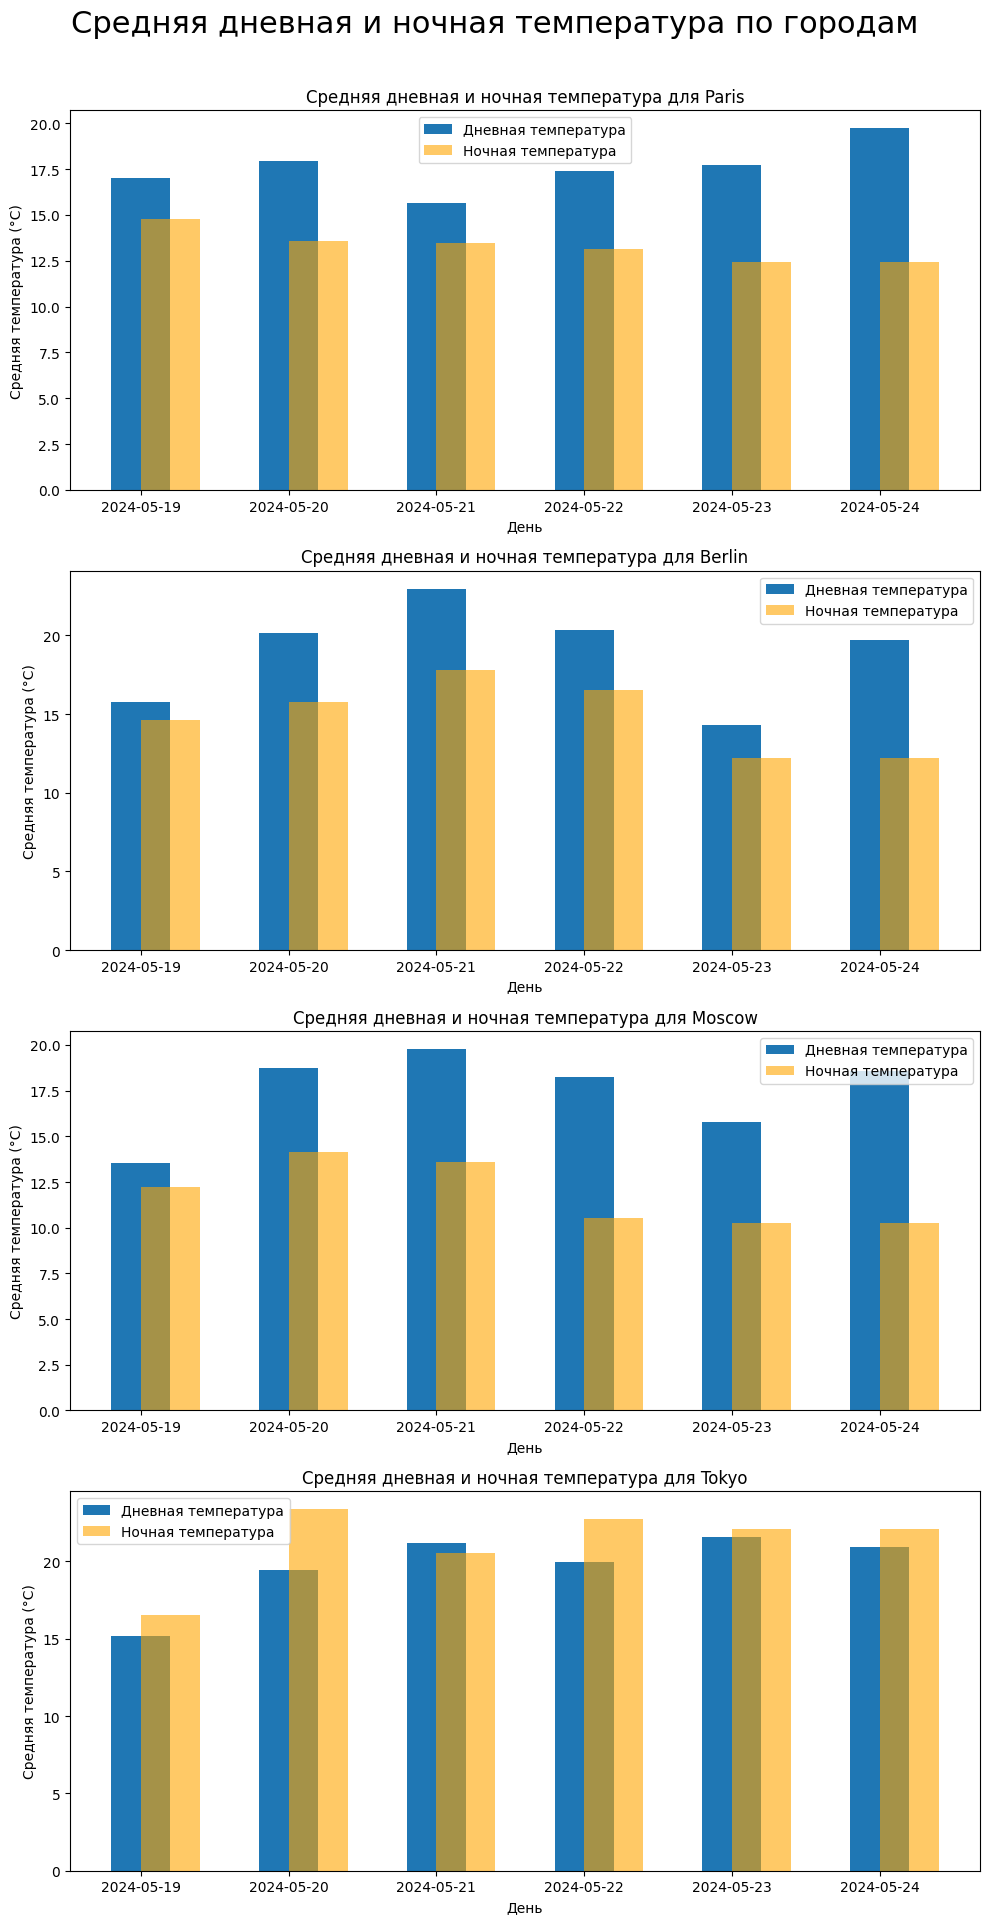

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Преобразование строки с датой и временем в объект datetime
weather_data['datetime'] = pd.to_datetime(weather_data['datetime'])

# Фильтрация данных для дневных температур (с 04:00 до 23:00)
filtered_day_data = weather_data[(weather_data['datetime'].dt.hour >= 4) & (weather_data['datetime'].dt.hour < 23)]
mean_daily_temperature_per_city = filtered_day_data.groupby(['city', filtered_day_data['datetime'].dt.date])['temperature'].mean().reset_index(name='mean_day_temp')

# Фильтрация данных для ночных температур (с 23:00 до 03:59)
filtered_night_data = weather_data[(weather_data['datetime'].dt.hour >= 23) | (weather_data['datetime'].dt.hour < 4)]
filtered_night_data['date'] = filtered_night_data['datetime'].dt.date
filtered_night_data.loc[filtered_night_data['datetime'].dt.hour < 4, 'date'] -= pd.Timedelta(days=1)
mean_nightly_temperature_per_city = filtered_night_data.groupby(['city', 'date'])['temperature'].mean().reset_index(name='mean_night_temp')

# Объединение дневных и ночных температур в один DataFrame
mean_temperature_per_city = pd.merge(mean_daily_temperature_per_city, mean_nightly_temperature_per_city, left_on=['city', 'datetime'], right_on=['city', 'date'], how='outer')
mean_temperature_per_city = mean_temperature_per_city.drop(columns='date')

# Заполнение пропущенных значений ночной температуры (если есть)
mean_temperature_per_city['mean_night_temp'] = mean_temperature_per_city['mean_night_temp'].fillna(method='ffill')

# Получение списка уникальных городов
locations = ['Paris', 'Berlin', 'Moscow', 'Tokyo']

# Создание подграфиков для каждого города
fig, axes = plt.subplots(len(locations), 1, figsize=(10, len(locations) * 5))
fig.suptitle('Средняя дневная и ночная температура по городам', y=0.96, fontsize=22)

for i, city in enumerate(locations):
    city_data = mean_temperature_per_city[mean_temperature_per_city['city'] == city]
    axes[i].bar(city_data['datetime'], city_data['mean_day_temp'], width=0.4, align='center', label='Дневная температура', color='#1f77b4')
    axes[i].bar(city_data['datetime'], city_data['mean_night_temp'], width=0.4, align='edge', label='Ночная температура', color='orange', alpha=0.6)
    axes[i].set_title(f'Средняя дневная и ночная температура для {city}')
    axes[i].set_xlabel('День')
    axes[i].set_ylabel('Средняя температура (°C)')
    axes[i].legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Задание №7. Постройте точечный график зависимости температуры от влажности для каждого города (На одной плоскости должно быть четыре графика):

##### Пример визуализации по одному городу:

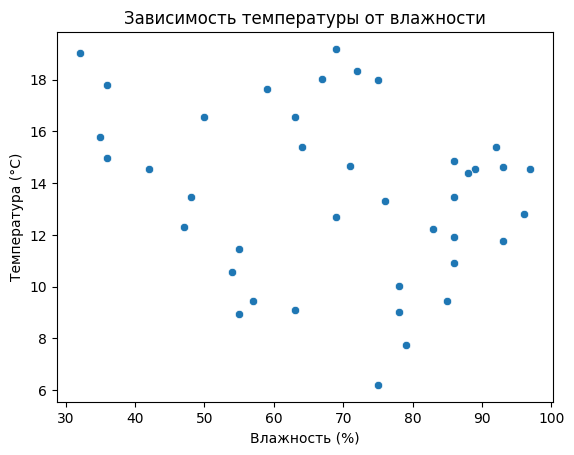

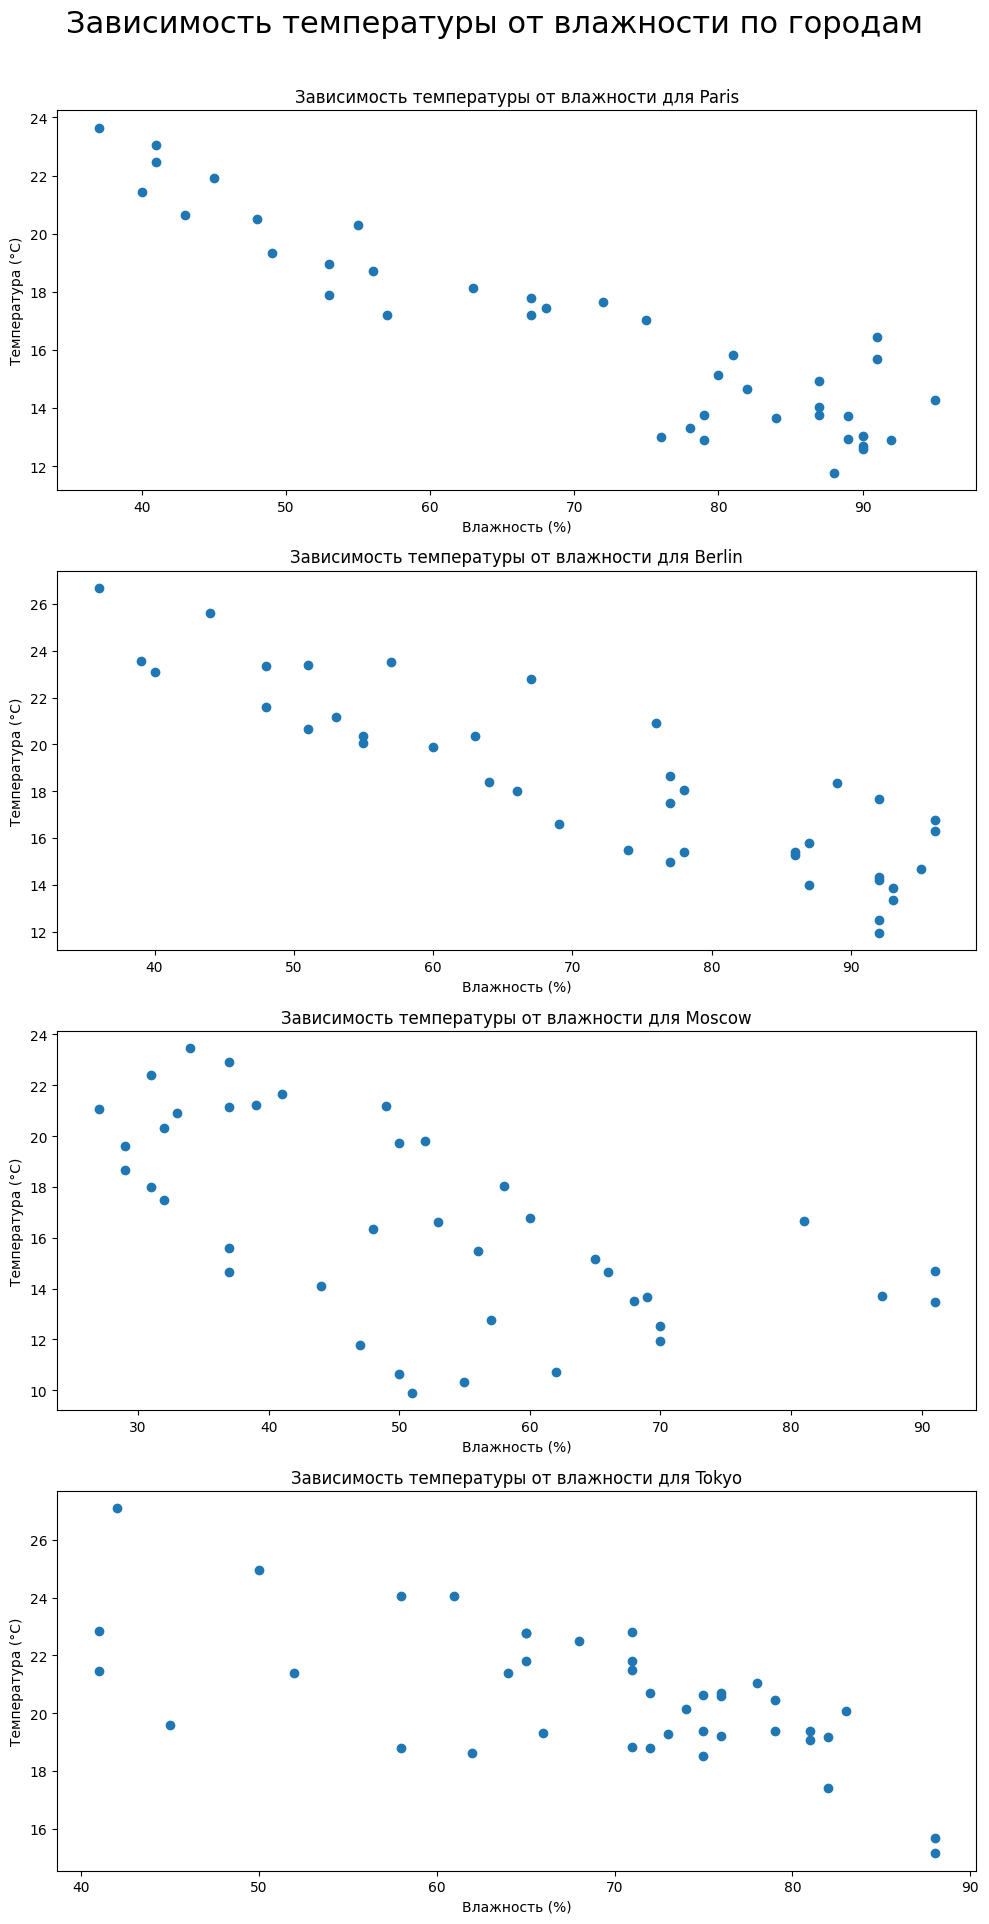

In [12]:
import pandas as pd
import matplotlib.pyplot as plt


# Получение списка уникальных городов
locations = weather_data['city'].unique()

# Создание подграфиков для каждого города
fig, axes = plt.subplots(len(locations), 1, figsize=(10, len(locations) * 5))
fig.suptitle('Зависимость температуры от влажности по городам', y=0.96, fontsize=22)

for i, city in enumerate(locations):
    city_data = weather_data[weather_data['city'] == city]
    axes[i].scatter(city_data['humidity'], city_data['temperature'])
    axes[i].set_title(f'Зависимость температуры от влажности для {city}')
    axes[i].set_xlabel('Влажность (%)')
    axes[i].set_ylabel('Температура (°C)')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Задание №8. Отобразите среднюю почасовую температуру для каждого города (На одной плоскости должно быть четыре графика):

##### Пример визуализации по одному городу:

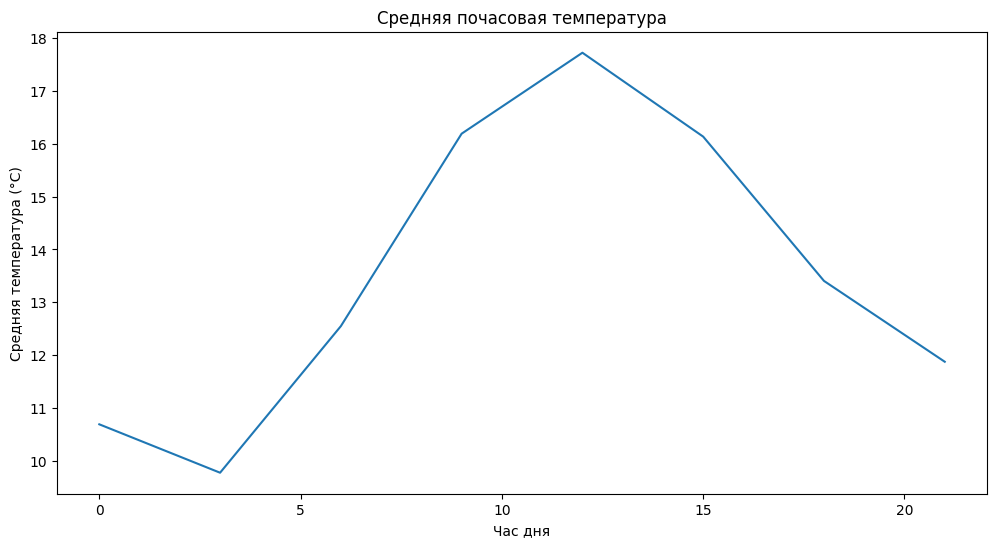

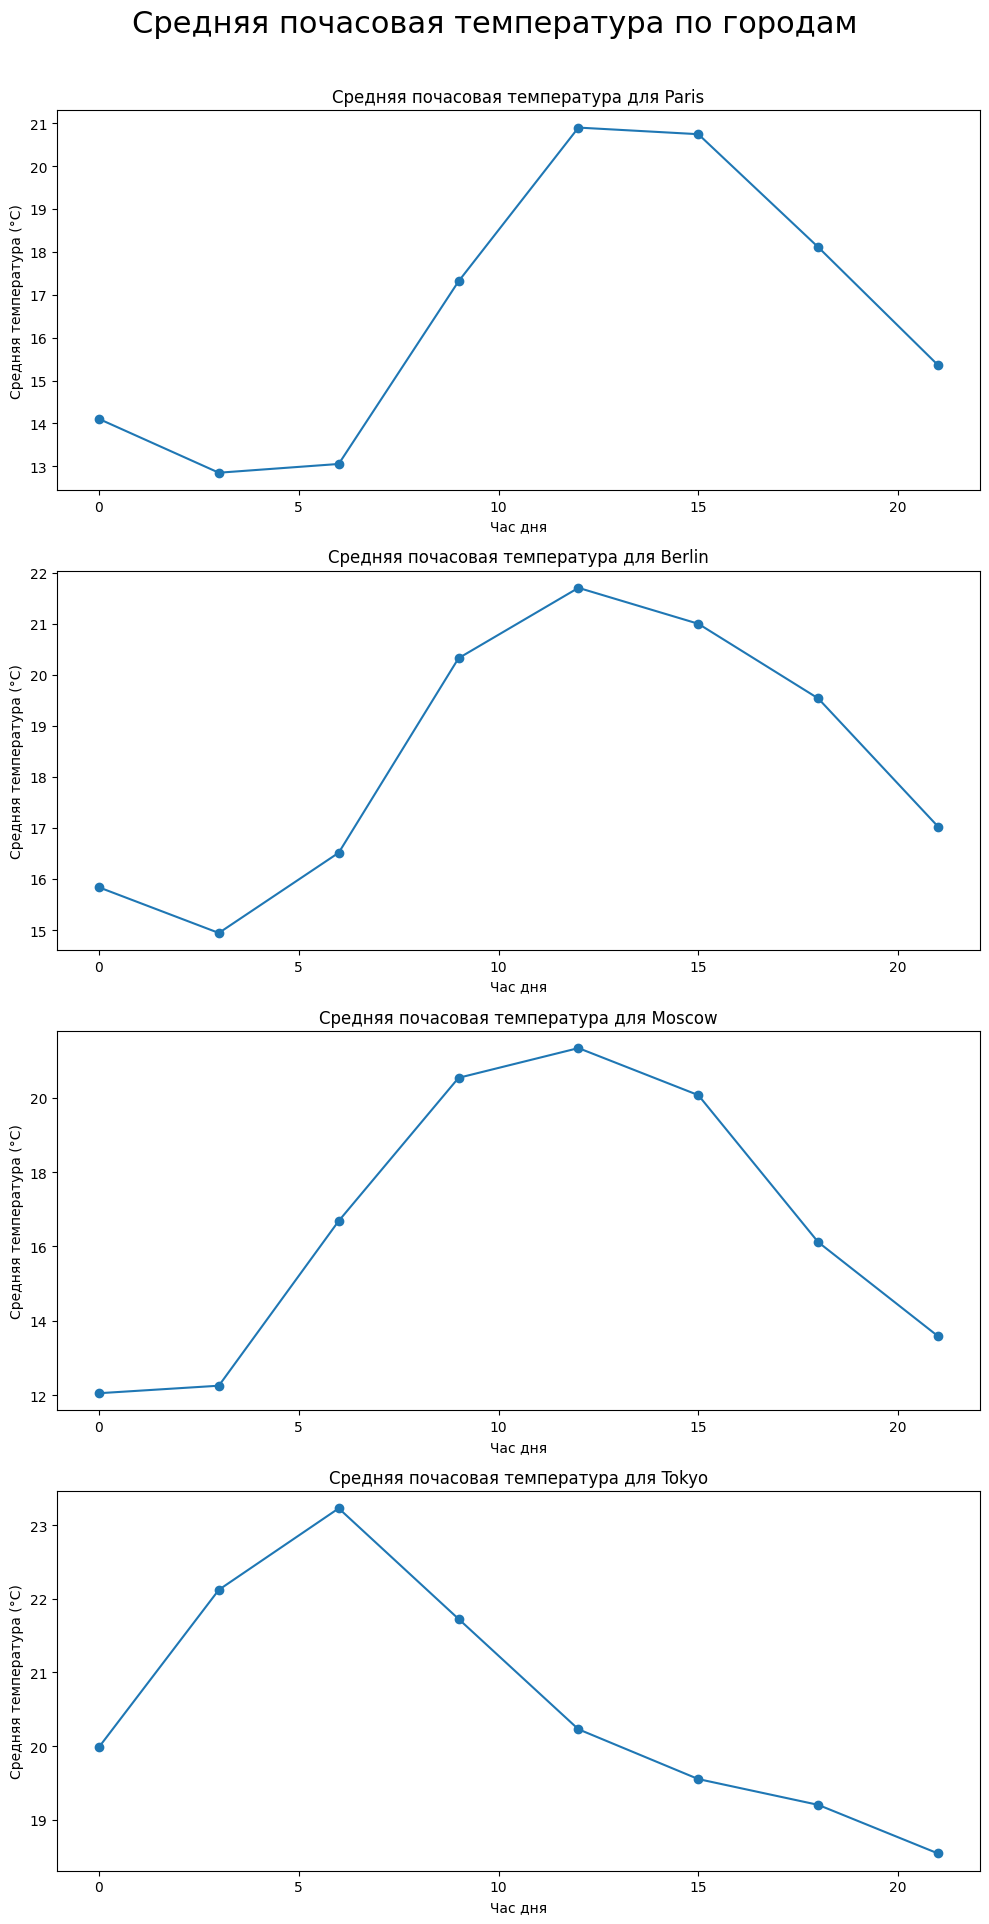

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Предполагаем, что у вас уже есть DataFrame weather_data с данными о погоде

# Преобразование строки с датой и временем в объект datetime
weather_data['datetime'] = pd.to_datetime(weather_data['datetime'])

# Добавление столбца для часа
weather_data['hour'] = weather_data['datetime'].dt.hour

# Получение списка уникальных городов
locations = weather_data['city'].unique()

# Создание подграфиков для каждого города
fig, axes = plt.subplots(len(locations), 1, figsize=(10, len(locations) * 5))
fig.suptitle('Средняя почасовая температура по городам', y=0.96, fontsize=22)

for i, city in enumerate(locations):
    city_data = weather_data[weather_data['city'] == city]
    hourly_mean_temp = city_data.groupby('hour')['temperature'].mean().reset_index()
    axes[i].plot(hourly_mean_temp['hour'], hourly_mean_temp['temperature'], marker='o')
    axes[i].set_title(f'Средняя почасовая температура для {city}')
    axes[i].set_xlabel('Час дня')
    axes[i].set_ylabel('Средняя температура (°C)')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# Блок 3. Прогнозирование

### Интегрируйте Вашу реализацию модели линейной регрессии из предыдущих работ:

In [178]:
import numpy as np

class LinearRegressionModel:
    def __init__(self):
        self.coefficients = None

    def fit(self, features, target):
        features_with_bias = np.c_[np.ones((features.shape[0], 1)), features]
        self.coefficients = np.linalg.pinv(features_with_bias.T @ features_with_bias) @ features_with_bias.T @ target

    def predict(self, features):
        features_with_bias = np.c_[np.ones((features.shape[0], 1)), features]
        return features_with_bias @ self.coefficients

    def score(self, features, target):
        predictions = self.predict(features)
        ss_res = np.sum((target - predictions) ** 2)
        ss_tot = np.sum((target - np.mean(target)) ** 2)
        return 1 - (ss_res / ss_tot)

# Создание и обучение модели
regression_model = LinearRegressionModel()

# Пример данных
features = np.array([[1, 2], [3, 4], [5, 6]])
target = np.array([2, 3, 5])

# Обучение модели
regression_model.fit(features, target)

# Предсказания
predictions = regression_model.predict(features)

# Вычисление коэффициента детерминации
r_squared_value = regression_model.score(features, target)

# Вывод результатов
print("Коэффициенты линейной регрессии:", regression_model.coefficients)
print("Предсказания:", predictions)
print("Коэффициент детерминации R^2:", r_squared_value)

Коэффициенты линейной регрессии: [0.47222222 0.13888889 0.61111111]
Предсказания: [1.83333333 3.33333333 4.83333333]
Коэффициент детерминации R^2: 0.9642857142857143


### Задание №1. Обучите модель регрессии предсказывать погоду на будущее (остальные признаки на будущее также вычисляются с помощью регрессии):

In [116]:
from sklearn.model_selection import train_test_split

params = ['temperature', 'feels_like', 'temp_min', 'temp_max', 'humidity', 'pressure']
scores = []
y_pred = []
models = []
for i in range(len(params)):
  param = params[i]
  new_params = params[:i] + params[i+1:]
  X = weather_data[new_params]
  y = weather_data[param]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  model = LinearRegression()
  model.fit(X_train, y_train)
  y_pred.append(model.predict(X_test))
  score = model.score(X_test, y_test)
  scores.append(score)
  models.append(model)

Выведите оценку точности:

In [117]:
for i in range(len(scores)):
  print(f'Score of the model: {scores[i]} for {params[i]}')

Score of the model: 0.999978905102869 for temperature
Score of the model: 0.9999050541006987 for feels_like
Score of the model: 0.9988915971797216 for temp_min
Score of the model: 0.9998994372338994 for temp_max
Score of the model: 0.9905377693496807 for humidity
Score of the model: 0.4505342295354804 for pressure


In [118]:
pred_data = []
for i in range(len(params)):
  param = params[i]
  new_params = params[:i] + params[i+1:]
  X = weather_data[new_params]
  pred_data.append(models[i].predict(X))

pred_weather = pd.DataFrame()
pred_weather['temperature'] = pred_data[0]
pred_weather['feels_like'] = pred_data[1]
pred_weather['temp_min'] = pred_data[2]
pred_weather['temp_max'] = pred_data[3]
pred_weather['humidity'] = pred_data[4]
pred_weather['pressure'] = pred_data[5]

### Задание №2. Обучите модель регрессии предсказывать погоду на будущее, вспомогательные признаки для прогноза должны передаваться пользователем:

(Модель получает на вход признаки за предыдущие дни, затем значения признаков за будущие дни и возвращает погоду на будущие дни)

In [179]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# Предполагается, что weather_data и pred_weather уже определены
params = ['temperature', 'feels_like', 'temp_min', 'temp_max', 'humidity', 'pressure']
scores = []
y_pred = []
models = []

for i in range(len(params)):
    param = params[i]
    new_params = params[:i] + params[i+1:]
    X_train = weather_data[new_params]  # За предыдущие дни
    y_train = weather_data[param]  # За предыдущие дни
    X_test = pred_weather[new_params]  # За будущие дни
    y_test = pred_weather[param]  # За будущие дни

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred.append(model.predict(X_test))
    score = model.score(X_test, y_test)
    scores.append(score)
    models.append(model)

weather_data['datetime'] = pd.to_datetime(weather_data['datetime'])
start_date = weather_data['datetime'].max().date()

# Генерация списка будущих дат на основе длины прогнозов
num_predictions = len(y_pred[0])
time_offsets = pd.date_range(start='00:00', end='21:00', freq='3H').time
datetime_list = []
num_days = num_predictions // len(time_offsets)

for day in range(num_days):
    current_date = start_date + pd.Timedelta(days=day)
    for time in time_offsets:
        datetime_list.append(pd.Timestamp.combine(current_date, time))

# Создание DataFrame для будущих прогнозов погоды
future_pred_weather = pd.DataFrame()
future_pred_weather['city'] = [weather_data['city'].iloc[0]] * num_predictions
future_pred_weather['country'] = [weather_data['country'].iloc[0]] * num_predictions
future_pred_weather['latitude'] = [weather_data['latitude'].iloc[0]] * num_predictions
future_pred_weather['longitude'] = [weather_data['longitude'].iloc[0]] * num_predictions
future_pred_weather['datetime'] = datetime_list[:num_predictions]  # Убедитесь, что длина верная

for i, param in enumerate(params):
    future_pred_weather[param] = y_pred[i]

# Добавление столбца с описанием
future_pred_weather['description'] = [weather_data['description'].iloc[0]] * num_predictions


KeyError: "['feels_like', 'temp_min', 'temp_max'] not in index"

In [120]:
for i in range(len(scores)):
  print(f'Score of the model: {scores[i]} for {params[i]}')

Score of the model: 0.9988825948880254 for temperature
Score of the model: 0.9981219346667058 for feels_like
Score of the model: 0.9996720374605106 for temp_min
Score of the model: 0.9995475590959405 for temp_max
Score of the model: 0.8786877985746638 for humidity
Score of the model: 0.882913103000059 for pressure


In [121]:
future_pred_weather

,city,country,latitude,longitude,datetime,temperature,feels_like,temp_min,temp_max,humidity,pressure,description
0,Paris,FR,48.85889,2.320041,2024-05-24 00:00:00,16.138674,15.732104,15.968434,16.100194,79.404262,1014.570445,light rain
1,Paris,FR,48.85889,2.320041,2024-05-24 03:00:00,15.231751,14.835575,15.007169,15.163848,86.398384,1014.221836,light rain
2,Paris,FR,48.85889,2.320041,2024-05-24 06:00:00,13.423870,13.077916,13.195940,13.383565,93.154490,1013.897553,light rain
3,Paris,FR,48.85889,2.320041,2024-05-24 09:00:00,12.941560,12.594794,12.787201,12.961711,89.126606,1014.456279,light rain
4,Paris,FR,48.85889,2.320041,2024-05-24 12:00:00,18.118048,17.693513,18.086565,18.154417,63.280202,1015.309960,light rain
...,...,...,...,...,...,...,...,...,...,...,...,...
155,Paris,FR,48.85889,2.320041,2024-06-12 09:00:00,22.729958,22.838310,22.795693,22.809262,63.427255,1008.048501,light rain
156,Paris,FR,48.85889,2.320041,2024-06-12 12:00:00,21.785989,21.912131,21.816845,21.850554,69.453134,1007.741164,light rain
157,Paris,FR,48.85889,2.320041,2024-06-12 15:00:00,20.698829,20.813197,20.696462,20.750958,74.555978,1007.869600,light rain
158,Paris,FR,48.85889,2.320041,2024-06-12 18:00:00,20.082124,20.277927,20.053731,20.126176,81.351302,1006.723743,light rain


Выведите оценку точности:

### Задание №3. Создайте новый датафрейм. Добавьте туда начальные значения температуры и предсказанные, а затем визуализируйте результаты на интерактивном таймфрейме по всем городам:

##### Пример визуализации:

In [122]:
import plotly.express as px

new_weather_data = pd.concat([weather_data, future_pred_weather], ignore_index=True)

fig = px.scatter_mapbox(new_weather_data,  # Данные для графика
                        lat="latitude",  # Колонка в данных, которая будет использоваться для широты точек на карте
                        lon="longitude",  # Колонка в данных, которая будет использоваться для долготы точек на карте
                        color="temperature",  # Колонка в данных, которая будет использоваться для цвета точек
                        size="humidity",  # Колонка в данных, которая будет использоваться для размера точек
                        hover_name="city",  # Колонка в данных, которая будет отображаться при наведении на точку
                        hover_data=["description"],  # Дополнительные данные, которые будут отображаться при наведении на точку
                        # Создание анимации по времени. Время преобразуется в строку для корректного отображения
                        animation_frame=new_weather_data['datetime'].dt.strftime('%Y-%m-%d %H:%M:%S'),
                        center={"lat": 50, "lon": 14},  # Центр карты при открытии
                        zoom=3,  # Уровень приближения карты при открытии
                        mapbox_style="carto-positron",  # Стиль карты
                        title="Прогноз погоды с предсказанием")  # Заголовок графика

fig.show()

## Задание №4. Выберите несколько стран, получите прогноз погоды по каждой их них, после чего сформируйте предскзания погоды на будущее и отобразите её в виде таймфрейма, используя px.choropleth() (тематическая карта)

#### Пример использования px.choropleth()

Этот код используется для создания тематической (хороплетной) карты.

* `px.choropleth()` - это функция, которая создает хороплетную карту. В данном случае, она принимает следующие аргументы:

- `gapminder` - набор данных, который будет использоваться для построения карты.
- `locations="iso_alpha"` - указывает на столбец данных, который будет использоваться для определения местоположений на карте. В данном случае, значения из столбца `iso_alpha` будут использоваться для определения местоположений.
- `color="lifeExp"` - указывает на столбец данных, который будет определять цвета на карте. В данном случае, значения из столбца `lifeExp` будут использоваться для определения цвета.
- `hover_name="country"` - указывает на столбец данных, который будет отображаться при наведении на местоположение на карте. В данном случае, значения из столбца `country` будут отображаться при наведении.
- `animation_frame="year"` - указывает на столбец данных, который будет использоваться для создания анимации на карте. В данном случае, значения из столбца `year` будут использоваться для создания анимации, показывая изменения со временем.
- `color_continuous_scale=px.colors.sequential.Plasma` - указывает на цветовую палитру, которая будет использоваться для отображения данных на карте. В данном случае, используется палитра Plasma из библиотеки Plotly Express.
- `projection="natural earth"` - указывает на проекцию карты. В данном случае, используется глобальная проекция карты "natural earth".

В итоге, данный код создаст тематическую (хороплетную) карту, на которой каждое местоположение будет отображаться цветом, соответствующим значению из столбца `lifeExp`. При наведении на каждое местоположение будет отображаться страна из столбца `country`. Карта будет анимированной, показывая изменения со временем, используя значения из столбца `year`. Цвета на карте будут использовать цветовую палитру Plasma, а проекция карты будет глобальной "natural earth".

In [143]:
import pandas as pd
import requests
import json
import plotly.express as px

countries = ['USA', 'Niger', 'Russia', 'Japan', 'France', 'China', 'Canada']
weather_data = {}
for country in countries:
    api_key = "83448bd3b7e010e3af0817fd643c8654"
    url = f'http://api.openweathermap.org/data/2.5/forecast?q={country}&appid={API_KEY}&cnt=32'
    response = requests.get(url)
    data = json.loads(response.text)
    weather_data[country] = data['list']
df_weather = pd.DataFrame()
for country, data in weather_data.items():
    temp_df = pd.DataFrame([{
        'country': country,
        'datetime': pd.to_datetime(item['dt_txt']),
        'temperature': item['main']['temp'] - 273.15,
        'humidity': item['main']['humidity'],
        'pressure': item['main']['pressure'],
        'description': item['weather'][0]['description']
    } for item in data])
    df_weather = pd.concat([df_weather, temp_df], ignore_index=True)

df_weather

,country,datetime,temperature,humidity,pressure,description
0,USA,2024-05-20 00:00:00,17.76,92,1016,broken clouds
1,USA,2024-05-20 03:00:00,17.04,92,1017,broken clouds
2,USA,2024-05-20 06:00:00,21.10,70,1018,broken clouds
3,USA,2024-05-20 09:00:00,24.84,55,1015,broken clouds
4,USA,2024-05-20 12:00:00,26.61,50,1012,broken clouds
...,...,...,...,...,...,...
219,Canada,2024-05-23 09:00:00,20.07,44,1016,scattered clouds
220,Canada,2024-05-23 12:00:00,23.79,34,1015,few clouds
221,Canada,2024-05-23 15:00:00,21.84,45,1014,few clouds
222,Canada,2024-05-23 18:00:00,19.84,50,1015,scattered clouds


In [144]:
params = ['temperature', 'humidity', 'pressure']
scores = []
y_pred = []
models = []

for i in range(len(params)):
  param = params[i]
  new_params = params[:i] + params[i+1:]
  X = df_weather[new_params]
  y = df_weather[param]

  model = LinearRegression()
  model.fit(X, y)
  y_pred.append(model.predict(X))
  score = model.score(X, y)
  scores.append(score)
  models.append(model)

pred_weather = pd.DataFrame()
start_date = df_weather['datetime'].max().date()
time_offsets = pd.date_range(start='00:00', end='21:00', freq='3H').time
datetime_list = []
num_days = 5
for day in range(num_days):
  current_date = start_date + pd.Timedelta(days=day)
  for time in time_offsets:
    datetime_list.append(pd.Timestamp.combine(current_date, time))
datetime_list = datetime_list * 7

pred_weather['country'] = df_weather['country']
pred_weather['datetime'] = datetime_list[:224]
pred_weather['temperature'] = y_pred[0]
pred_weather['humidity'] = y_pred[1]
pred_weather['pressure'] = y_pred[2]
pred_weather['description'] = df_weather['description']
pred_weather

,country,datetime,temperature,humidity,pressure,description
0,USA,2024-05-23 00:00:00,16.882656,66.368308,1015.316559,broken clouds
1,USA,2024-05-23 03:00:00,15.590863,68.521292,1015.563794,broken clouds
2,USA,2024-05-23 06:00:00,15.566248,66.138171,1013.647985,broken clouds
3,USA,2024-05-23 09:00:00,20.305614,58.179836,1012.008047,broken clouds
4,USA,2024-05-23 12:00:00,24.468991,52.090985,1011.281697,broken clouds
...,...,...,...,...,...,...
219,Canada,2024-05-25 09:00:00,19.647410,64.176173,1013.385141,scattered clouds
220,Canada,2024-05-25 12:00:00,21.515194,59.176261,1011.870633,few clouds
221,Canada,2024-05-25 15:00:00,22.173398,59.557043,1012.801067,few clouds
222,Canada,2024-05-25 18:00:00,20.593610,62.924716,1013.606394,scattered clouds


In [145]:
for i in range(len(scores)):
  print(f'Score of the model: {scores[i]} for {params[i]}')
new_df_weather = pd.concat([df_weather, pred_weather], ignore_index=True)

fig = px.choropleth(
    new_df_weather,
    locations='country',
    locationmode='country names',
    color='temperature',
    hover_data=['humidity', 'pressure', 'description'],
    animation_frame='datetime',
    title='Weather forecast'
)

fig.show()

Score of the model: 0.5764670944239465 for temperature
Score of the model: 0.26535433026301714 for humidity
Score of the model: 0.5675921583472474 for pressure


# Блок №4. Модели прогнозирования семейства ARIMA

## Задание №1. Ознакомьтесь с теоритическим материалом и примерами по ссылке ниже:

### Ссылка: https://colab.research.google.com/drive/1WsEyJxvQ52W5nB3XN7HEfeHI8sgDPDMr?usp=sharing

## Задание №2. Сформируйте прогноз погоды на будущее, используя одну из моделей семейства ARIMA и визуализируйте таймфрейм

In [175]:
import requests
import pandas as pd

def fetch_weather(city, api_key):
    url = f'http://api.openweathermap.org/data/2.5/forecast?q={city}&appid={API_KEY}&units=metric'
    response = requests.get(url)
    return response.json()

def parse_weather_data(data, city):
    weather_data = []
    for item in data['list']:
        weather = {
            'city': city,
            'datetime': pd.to_datetime(item['dt_txt']),
            'temperature': item['main']['temp'],
            'humidity': item['main']['humidity'],
            'pressure': item['main']['pressure'],
            'description': item['weather'][0]['description']
        }
        weather_data.append(weather)
    return weather_data

def main(cities, api_key):
    all_weather_data = []
    for city in cities:
        data = fetch_weather(city, api_key)
        weather_data = parse_weather_data(data, city)
        all_weather_data.extend(weather_data)
    return pd.DataFrame(all_weather_data)

cities =  ['Tokio', 'Paris', 'Moscow', 'Berlin', 'London']
weather_df = main(cities, API_KEY)
weather_df


,city,datetime,temperature,humidity,pressure,description
0,Tokio,2024-05-20 00:00:00,15.42,91,1014,moderate rain
1,Tokio,2024-05-20 03:00:00,17.10,83,1013,light rain
2,Tokio,2024-05-20 06:00:00,19.42,73,1011,overcast clouds
3,Tokio,2024-05-20 09:00:00,20.34,71,1012,overcast clouds
4,Tokio,2024-05-20 12:00:00,19.55,79,1013,broken clouds
...,...,...,...,...,...,...
195,London,2024-05-24 09:00:00,13.73,60,1020,overcast clouds
196,London,2024-05-24 12:00:00,17.33,49,1020,overcast clouds
197,London,2024-05-24 15:00:00,17.34,53,1020,broken clouds
198,London,2024-05-24 18:00:00,16.85,58,1020,overcast clouds


In [176]:
import pandas as pd
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

# Преобразование столбца 'datetime' в тип datetime
weather_df['datetime'] = pd.to_datetime(weather_df['datetime'])

# Функция для прогнозирования температуры с использованием модели ARIMA
def forecast_temperature(data, city):
    # Выбор данных по температуре для конкретного города
    city_temperatures = data.loc[data['city'] == city, 'temperature']

    # Настройка модели ARIMA с автоматическим подбором параметров
    model = auto_arima(
        city_temperatures, start_p=1, start_q=1, max_p=3, max_q=3,
        seasonal=True, m=12, d=None, D=1,
        trace=True, error_action='ignore', suppress_warnings=True, stepwise=True
    )

    # Обучение модели на данных
    model_fit = model.fit(city_temperatures)

    # Прогнозирование на 24 периода вперед
    forecast = model_fit.predict(n_periods=24)
    return forecast

# Функция для создания DataFrame с прогнозными данными
def create_forecast_df(city, start_date, forecast):
    # Создание диапазона дат для прогноза
    forecast_dates = pd.date_range(start=start_date, periods=len(forecast), freq='H')

    # Создание DataFrame с прогнозными данными
    forecast_df = pd.DataFrame({
        'datetime': forecast_dates,
        'city': city,
        'temperature': forecast,
        'humidity': None,
        'pressure': None,
        'description': None
    })
    return forecast_df

# Функция для объединения исходных данных и прогнозов
def combine_weather_forecasts(data):
    combined = pd.DataFrame(columns=['datetime', 'city', 'temperature', 'humidity', 'pressure', 'description'])
    unique_cities = data['city'].unique()  # Получение списка уникальных городов

    for city in unique_cities:
        city_data = data[data['city'] == city].reset_index(drop=True)  # Данные для конкретного города
        city_forecast = forecast_temperature(data, city)  # Прогноз для города
        last_date = city_data['datetime'].max()  # Последняя дата в данных
        forecast_df = create_forecast_df(city, last_date, city_forecast)  # DataFrame с прогнозными данными

        # Объединение исходных данных и прогнозов
        combined = pd.concat([combined, city_data, forecast_df]).reset_index(drop=True)

    combined.set_index('datetime', inplace=True)  # Установка индекса по дате и времени
    return combined

# Получение комбинированного DataFrame с исходными данными и прогнозами
combined_data = combine_weather_forecasts(weather_df)


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=119.771, Time=0.38 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=159.547, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=126.506, Time=0.15 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=157.611, Time=0.02 sec
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.67 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=117.788, Time=0.17 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=123.922, Time=0.09 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=119.773, Time=0.47 sec
 ARIMA(1,0,1)(2,1,1)[12] intercept   : AIC=121.759, Time=2.95 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=127.029, Time=0.33 sec
 ARIMA(2,0,1)(1,1,0)[12] intercept   : AIC=105.323, Time=0.57 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=103.385, Time=0.18 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=105.295, Time=0.48 sec
 ARIMA(2,0,1)(1,1,1)[12] intercept   : AI

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=124.634, Time=0.90 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=196.593, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=194.787, Time=0.02 sec
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=123.193, Time=0.30 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=124.621, Time=1.00 sec
 ARIMA(1,0,1)(2,1,1)[12] intercept   : AIC=126.619, Time=1.09 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=124.966, Time=0.32 sec
 ARIMA(2,0,1)(1,1,0)[12] intercept   : AIC=114.032, Time=0.45 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=138.968, Time=0.11 sec
 ARIMA(2,0,1)(2,1,0)[12] intercept   : AIC=112.770, Time=1.66 sec
 ARIMA(2,0,1)(2,1,1)[12] intercept   : AIC=114.75

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=135.793, Time=0.36 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=189.815, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=143.501, Time=0.13 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=188.365, Time=0.02 sec
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=133.804, Time=0.19 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=153.019, Time=0.07 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=135.793, Time=0.47 sec
 ARIMA(1,0,1)(2,1,1)[12] intercept   : AIC=137.792, Time=0.56 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(2,0,1)(1,1,0)[12] intercept   : AIC=126.300, Time=0.29 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=145.092, Time=0.09 sec
 ARIMA(2,0,1)(2,1,0)[12] intercept   : AIC=128.239, Time=0.64 sec
 ARIMA(2,0,1)(1,1,1)[12] intercept   : AIC=12

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=120.582, Time=0.37 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=171.986, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=170.093, Time=0.02 sec
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=118.664, Time=0.23 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=142.804, Time=0.08 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=120.582, Time=0.79 sec
 ARIMA(1,0,1)(2,1,1)[12] intercept   : AIC=122.581, Time=0.73 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=121.443, Time=0.23 sec
 ARIMA(2,0,1)(1,1,0)[12] intercept   : AIC=110.168, Time=0.48 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=118.070, Time=0.18 sec
 ARIMA(2,0,1)(2,1,0)[12] intercept   : AIC=111.321, Time=1.22 sec
 ARIMA(2,0,1)(1,1,1)[12] intercept   : AIC=in

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



In [177]:
import pandas as pd
import requests
import plotly.express as px

def get_coordinates(city):
    url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={API_KEY}'
    response = requests.get(url)
    data = response.json()
    if 'coord' in data:
        latitude = data['coord']['lat']
        longitude = data['coord']['lon']
        return latitude, longitude
    else:
        return None, None

combined_data['latitude'] = None
combined_data['longitude'] = None

cities = ['Tokio', 'Paris', 'Moscow', 'Berlin', 'London']

for city in cities:
    latitude, longitude = get_coordinates(city)
    if latitude is not None and longitude is not None:
        combined_data.loc[combined_data['city'] == city, ['latitude', 'longitude']] = latitude, longitude

combined_data.reset_index(inplace=True)

fig = px.scatter_mapbox(combined_data,
                        lat="latitude",
                        lon="longitude",
                        color="temperature",
                        hover_name="city",
                        hover_data=["temperature"],
                        animation_frame="datetime",
                        zoom=3,
                        range_color=[combined_data['temperature'].min(), combined_data['temperature'].max()],
                        mapbox_style="carto-positron",
                        size="temperature"
                        )

fig.show()